# Prepare the Notebook

In [0]:
!pip install control
!git clone https://magiccvs.byu.edu/gitlab/whirlybird/control_book_public_solutions.git
!cd control_book_public_solutions/;  git checkout Fall19_edits; 

fatal: destination path 'control_book_public_solutions' already exists and is not an empty directory.
Already on 'Fall19_edits'
Your branch is up to date with 'origin/Fall19_edits'.
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (348/348), done.
remote: Compressing objects: 100% (331/331), done.
remote: Total 347 (delta 16), reused 347 (delta 16)
Receiving objects: 100% (347/347), 27.27 MiB | 10.82 MiB/s, done.
Resolving deltas: 100% (16/16), completed with 1 local object.
From https://magiccvs.byu.edu/gitlab/whirlybird/control_book_public_solutions
   d1f9102..def7662  Fall19_edits -> origin/Fall19_edits
Updating d1f9102..def7662
Fast-forward
 _images/figuresToPNG                               | 110 +++++++++++++++++++++
 _images/figures_1/sm_gravity_potential.png         | Bin 0 -> 11169 bytes
 _images/figures_1/sm_many_masses.png               | Bin 0 -> 34290 bytes
 _images/figures_1/sm_mass_at_velocity.png          | Bin 0 -> 4779 bytes
 _images/figures_1/s

In [0]:
import sys
import numpy as np
import control as c
from control.matlab import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12) #set the figure size
from IPython.display import Latex
from IPython.display import Image

In [0]:
# How to bring in figures from the git repository
#basename = 'control_book_public_solutions/_images/'
#Img1 = Image(filename=basename+'figures_5/ls_constraint_gamma_r.png',width=1000)
#Img2 = Image(filename=basename+'figures_5/ls_constraint_gamma_n.png',width=1000)

In [0]:
#Img1

# Chapter 15 - Frequency Response
Chapter 15 covers the frequency response of LTI (linear time-invariant) systems.  

Any complex number $z$ can be represented in rectangular coordinates as
$z = \Re\{z\} + j \Im\{z\}$,

where $\Re\{z\}$ is the real part of $z$, and $\Im\{z\}$ is the imaginary part of $z$.  

Similarly, $z$ can be represented in polar form as
$z = |z|e^{j\angle z}$,

where $|z|$ denotes the magnitude of $z$ and $\angle z$ denotes the angle or phase of $z$.  These are defined as
$|z| = \sqrt{\Re\{z\}^2 + \Im\{z\}^2} $

$\angle z = \tan^{-1}\frac{\Im\{z\}}{\Re\{z\}}$.

Similarly, from Euler's relationship 
$e^{j\theta} = \cos\theta + j\sin\theta$,
we have that
$z = |z|e^{j\angle z} = |z|\cos\angle z + j |z|\sin\angle z$, 
which implies that

$\Re\{z\} = |z|\cos\angle z $

$\Im\{z\} = |z|\sin\angle z$.

It is important to note that when mulitplying complex numbers, the magnitudes multiply but the phases add.  And then in division, the magnitudes divide, but the phases subtract: 

Suppose that $z_1 = |z_1|e^{j\angle z_1}$ and $z_2=|z_2|e^{j\angle z_2}$ are two complex numbers, then 

$z_1z_2 = |z_1| |z_2| e^{j(\angle z_1 + \angle z_2)}$.

Similarly, we have

$\frac{z_1}{z_2} = \frac{|z_1|}{|z_2|}e^{j(\angle z_1 - \angle z_2)}$.

## Magnitude and Phase of a Transfer Function
With the above, we can derive the magnitude and phase of a transfer function: 

$|H(s)| = \frac{|K| |s+z_1| |s+z_2| \dots |s+z_m|}{|s+p_1| |s+p_2| \dots |s+p_n|}$

$\angle H(s) = \angle K + \sum_{i=1}^m \angle (s+z_i) - \sum_{i=1}^n \angle (s+p_i)$.

## Bode form 
The first step for computing approximations of Bode plots is to get the transfer function into Bode form.  A hypothetical transfer function that will prove useful later is: 
$K G(s) = K \frac{(s + z_1)(s+z_2)}{s^2 (s+p_1)(s^2 + 2 \zeta \omega_n s + \omega_n^2)}$

Now in Bode form, we substitute $j\omega$ for $s$ : 
$K G(s) = K_0 \frac{(j \omega  \tau_1+ 1)(j \omega \tau_2 + 1)}{(j \omega)^2 (j \omega \tau_3+ 1)((\frac{j \omega}{\omega_n})^2 + \frac{2 \zeta}{\omega_n} j \omega + 1)}$,
where $\tau_1 = 1/z_1$, $\tau_2 = 1/z_2$, $\tau_3 = 1/p_1$, and so forth and $K_0 =  \frac{K z_1 z_2 }{p_1 \omega_n^2}$ 

### Simple Example
So if we had a transfer function $H(s) = \frac{k}{s + p}$.  Placing that into bode form would be: 

$H(j\omega) = \frac{k_0}{\tau_1 j \omega + 1}$, where $k_0 = \frac{k}{p}$. 

The magnitude of our tranfer function:

$H(j\omega) = \frac{|k_0|}{\sqrt{(\tau_1 j \omega + 1)(-\tau_1 j \omega + 1)}}$

$H(j\omega) = \frac{k_0}{\sqrt{(\tau_1^2 \omega^2 + 1)}}$

And the phase of our transfer function: 

$\angle H(j\omega) = \angle k_0 - \angle (\tau_1 j \omega + 1) $

$\angle H(j\omega) = 0 - \tan^{-1}(\frac{\tau_1  \omega}{1}) $

### Numerical Version
Below is a numerical version of the same simple example. 

In [0]:
k = 2
p = 10
tau = 1/p
k0 = k/p
omega = 1
magH = k0/np.sqrt(tau**2 * omega**2 + 1)
phH = -np.arctan2(tau*omega,1)
print('Magnitude of H: ', magH, ' Phase of H: ', phH*180/np.pi)
# Now use built in functions to check: 
H = tf([k],[1, p])
mag, phase, omega = bode(H,[1],Plot=False)
print('Magnitude of H: ', mag, ' Phase of H: ', phase*180/np.pi)

Magnitude of H:  0.19900743804199786  Phase of H:  -5.710593137499643
Magnitude of H:  [0.19900744]  Phase of H:  [-5.71059314]


# 15.1.2 Frequency Response of LTI Systems
The transfer function is an elegant and compact representation of the frequency response of a system, in that the magnitude of $H(j\omega_0)$ describes the gain of the system for input signals with frequency $\omega_0$, and the phase of $H(j\omega_0)$ describes the phase shift imposed by the system on input signals with frequency $\omega_0$.

The code and plots below demonstrate that as the frequency $\omega_0$ changes, the output of the transfer function changes, in both magnitude and phase.  


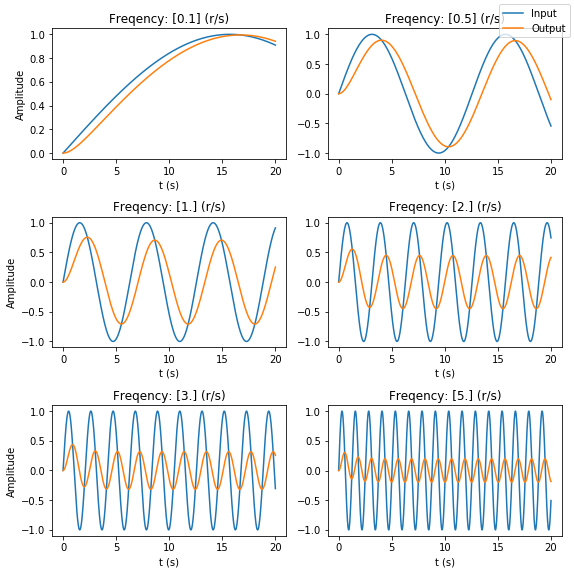

In [0]:
# Feel free to adjust the top parameters and see how things change: 
H = tf([1],[1,1]) # The system to simulate
w0 = [.1,.5,1.,2.,3.,5.] # the different frequencies (rad/s) we want to look at
w0 = np.reshape(w0,(6,1)) # make it broadcast
stp = 20. # how long to simulate for
dt = 0.01 # timestep 

# Simulate the system
t = linspace(0.,stp,np.ceil(stp/dt)); 
rads = w0*t
u = np.sin(rads)
y = np.zeros((6,t.size))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axs = axs.ravel()

for i in range(0,w0.size):
  y[i,:], T, xout = lsim(H,u[i,:],t)
  axs[i].plot(t,u[i,:],t,y[i,:])
  axs[i].set_title('Freqency: ' + str(w0[i]) + ' (r/s)' )
  axs[i].set_xlabel('t (s)')

axs[0].set_ylabel('Amplitude')
axs[2].set_ylabel('Amplitude')
axs[4].set_ylabel('Amplitude')
fig.legend(('Input','Output'))
fig.tight_layout()

The blue line in the plots above are the input and the orange lines are the output, through the transfer function $H(j \omega)$. As the frequency goes up, the magnitude of the output is suppressed dramatically and the output also lags in phase.  Wouldn't it be great to have a view of how the magnitude and phase change with frequency??  Yep, it would. It's called a Bode Plot: 
## Bode Plot

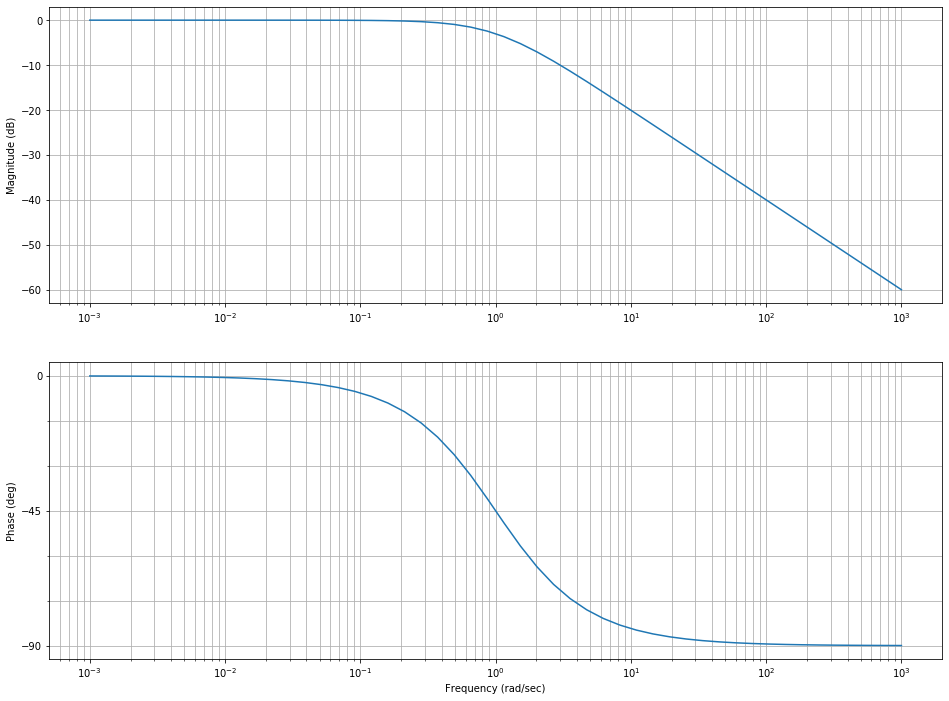

In [0]:
omega = (0.001,1000)
mag, phase, w = bode(H,omega_limits=omega, Hz=False)

Here, the $x$ axis is frequency and then on the $y$ axes, we have a magnitude plot (expressed in decibels - dBs) and phase (expressed in degrees).  As the frequency plot increases, the magnitude is supressed and the phase moves toward a $90^o$ shift, which is what we were seeing the the above plots. 

#15.1.3 Straight Line Approximation of Bode Plots Notes
This set of notes facilitates learning how to do rough hand drawn Bode plots.  It is important to note that **these notes deviate  from the approach outlined in Chapter 15.1.3 of the [textbook](http://controlbook.byu.edu/doku.php)**

## Bode form 
The first step for computing approximations of Bode plots is to get the transfer function into Bode form.

Recall our generic example in Bode form: 
$K G(s) = K_0 \frac{(j \omega  \tau_1+ 1)(j \omega \tau_2 + 1)}{(j \omega)^2 (j \omega \tau_3+ 1)((\frac{j \omega}{\omega_n})^2 + \frac{2 \zeta}{\omega_n} j \omega + 1)}$ 

Notice that $K_0$ is the DC gain of the transfer function.


# Terms in Bode Form 
There are three terms that are important when we are doing straight-line approximations for Bode Plots.  The overall goal will be to indentify these terms in the transfer function you want to plot, plot each term and then combine the overall plot together. 

1) $\pm K_0 (j \omega)^{\pm n}$

2) $(j \omega \tau + 1)^{\pm 1}$

3) $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1}$



## 1) Plotting $\pm K_0 (j \omega)^{\pm n}$
There are really two terms to consider in $ \pm K_0 (j \omega)^{\pm n}$: $K_0$ and $(j \omega)^{\pm n}$

Plotting $K_0$ is just a matter of plotting the dB form of the gain: Mag $= 20log_{10}(K_0)$.  See the example below, feel free to change the value of k and see the changes. 

6.020599913279624


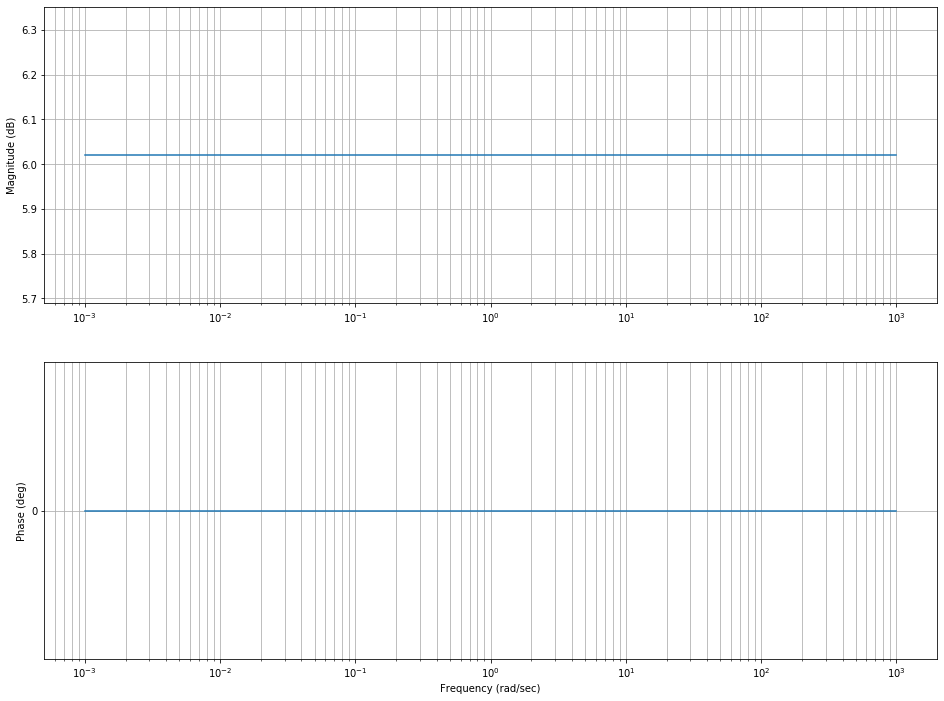

In [0]:
k0 = 2
mag = 20*np.log10(k0)
print(mag)
omega = (0.001,1000)
H = tf([k0],[1])
mag, phase, w = bode(H,omega_limits=omega, Hz=False)

The slightly more complicated term is $\pm (j \omega)^{\pm n}$.

### Magnitude Plot

As we take the $log$ of the expression, we get: 
$\log(K_0(j \omega)^n$ = $\log(K_0) + n \log(|j \omega|)$ So the magnitude line is then a straight line of slope $n$ (times 20 dB/decade of frequency), with an intercept of $K_0$ when $\omega = 1$

### Phase Plot

The phase plot is a straight line at $\phi = n \times 90^o$ 

### Numerical Example

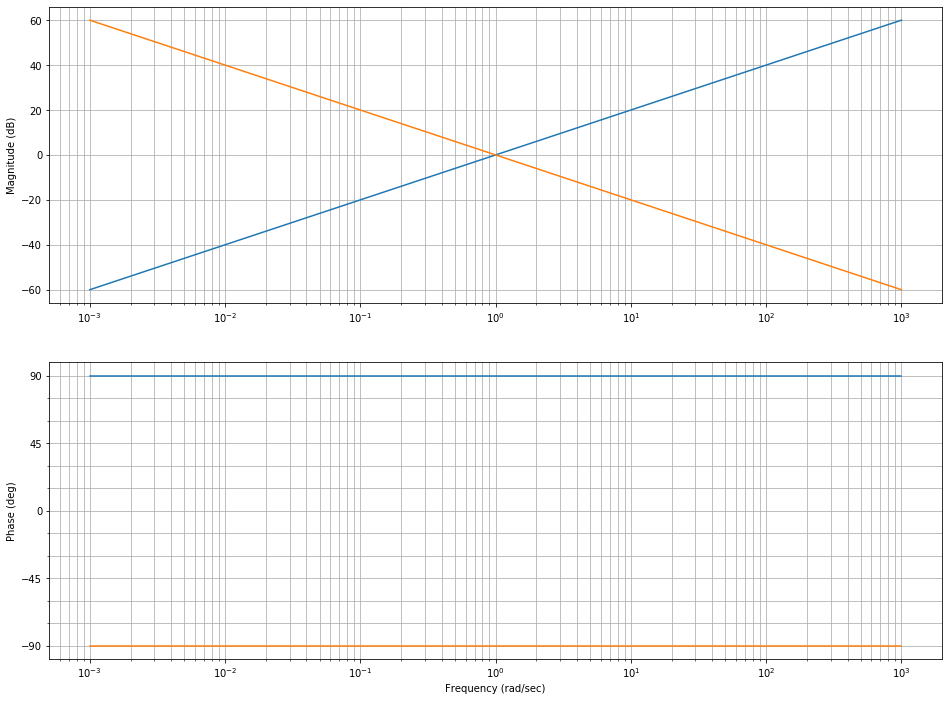

In [0]:
H1 = tf([1., 0.],[1.]) #n = 1
H2 = tf([1.],[1., 0.]) # n = -1
mag2, ph2, w2 = bode(H1, H2, omega_limits=omega, Hz=False)

Here the zero has the positive 20 dB/slope slope for Magnitude and $+90^o$ Phase (in blue) and the pole has the negative 20 dB/decade slope for Magnitude and $-90^o$ in Phase in red.

## 2) Plotting $(j \omega \tau + 1)^{\pm 1}$ Terms
Approximating the $(j \omega \tau + 1)^{\pm 1}$ term requires examining two conditions: $j \omega \tau << 1$ and $j \omega \tau >> 1$ for both the Magnitude and Phase plots. 

### Magnitude 
When $j \omega \tau << 1$, $(j \omega \tau + 1)^{\pm 1} \approx 1 = 0\text{dB}$

When $j \omega \tau >> 1$, $(j \omega \tau + 1)^{\pm 1} \approx (j \omega \tau)^{\pm 1}$.  This means, like was demonstrated above for part 1, that the line will have either a positive or negative 20 dB/decade slope. 

The breakpoint occurs at $\omega = \frac{1}{\tau}$.  This is the transition between the two slopes.

### Phase
When $j \omega \tau << 1$, $\angle (j \omega \tau + 1)^{\pm 1} \approx \angle 1 = 0^o$

When $j \omega \tau >> 1$, $\angle (j \omega \tau + 1)^{\pm 1} \approx \angle (j \omega \tau)^{\pm 1} = \pm 90^o$, like shown in term 1 above.

The transition point for the phase also occurs as $\omega = \frac{1}{\tau}$ and passes through $\pm45^o$ phase at that point.  There are methods for determining the width of the transition, but we will not worry about plotting those in this course. 

### Numerical Example: 

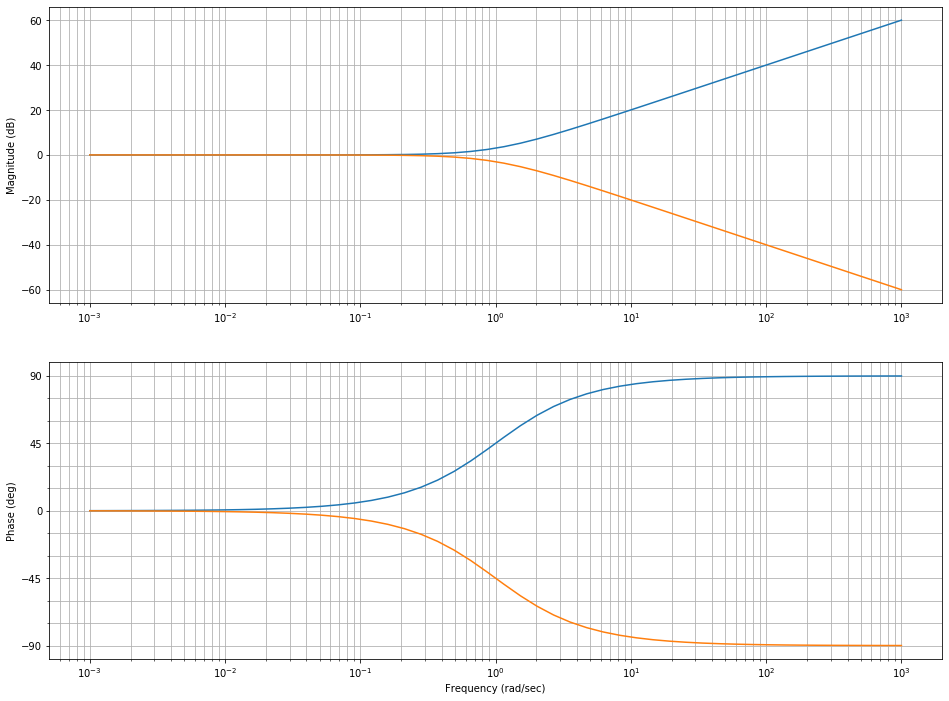

In [0]:
tau = 1 
H1 = tf([tau, 1],[1]) #n = 1
H2 = tf([1],[tau, 1]) #n = -1
mag3, ph3, w3 = bode(H1,H2,omega_limits=omega, Hz=False) 

Again, the zero term has positive slope and positive phase (blue) and the pole term has negative slope and negative phase (red). 

## 3) Plotting $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1}$ Terms

The final type of term that we will approximate plotting by hand is the second order terms, as either poles or zeros.  Similar to term 2, we will also break the plots up into two conditions: $ \frac{\omega}{\omega_n} << 1$ and $\frac{\omega}{\omega_n} >> 1$ for both the Magnitude and Phase plots.

### Magnitude
When $ \frac{\omega}{\omega_n} << 1$, $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1} \approx 1 = 0\text{dB}$

When $ \frac{\omega}{\omega_n} >> 1$, $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1} \approx (\frac{j \omega}{\omega_n})^{\pm 2}$, which means that there is a $\pm 40$dB/decade slope. (twice the slope of the first term explained above)  

The breaking point occurs at $\omega_n$, the natural frequency of the system or pole.  At the natural frequency, there can be a bit of a bump, depending on the damping coefficient of the pole/zero pair (examine this in the code below).  

### Phase
When $ \angle \frac{\omega}{\omega_n} << 1$, $\angle ((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1} \approx \angle 1 = 0^o$

When $ \frac{\omega}{\omega_n} >> 1$, $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1} \approx \angle (\frac{j \omega}{\omega_n})^{\pm 2} = \pm 180^o$ 

The transition in phase also depends on the amount of damping $\zeta$ in the system.  The less damping, the faster the transition from $0^o$ to $\pm 180^o$.  

### Numerical Example

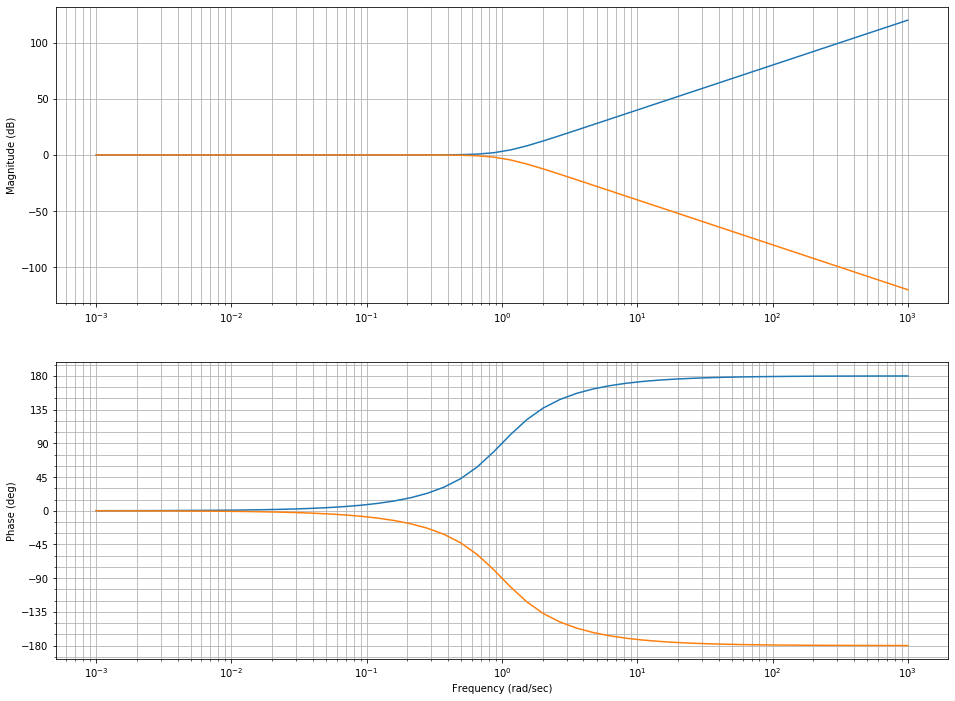

In [0]:
tau = 1 
zeta = 0.707 # Note how the height of the bump and slope of the phase asymptote depend on the damping coefficient here
wn = 1 # moving this will just shift the curves to the left or right
H1 = tf([(1./wn)**2., 2.*zeta*1./wn, 1.],[1.]) #n = 1
H2 = tf([1],[(1./wn)**2., 2.*zeta*1./wn, 1.]) #n = -1
mag4,ph4,w4 = bode(H1,H2,omega_limits=omega, Hz=False)

Here again, the zeros have positive slope and phase, in blue and the poles have negative slope and phase, in red.  Notice the steaper slope (by observing the axis limits on $y$). 

# Plotting Summary: 
So the overall methodology for putting together a composite sketch for a Bode plot is to: 


1.   Put the transfer function in Bode Form and identify the key terms: 

      a) $\pm K_0 (j \omega)^{\pm n}$

      b) $(j \omega \tau + 1)^{\pm 1}$

      c) $((\frac{j \omega}{\omega_n})^2 + 2 \zeta \frac{j \omega}{\omega_n} + 1)^{\pm 1}$
2.   Plot the magnitude (in dB) for each individual term of each class.

3.   Generate a composite magnitude sketch, working from low frequency to high frequency. 

4.   Plot the low-frequency phase term from the $\pm K_0 (j \omega)^{\pm n}$ term.  

5.   Generate the composite phase sketch, by stepping $\pm 90^o$ or $\pm 180^o$ at break points, working from low to high frequency.



# Putting Everything Together: Example

This example is digital, but it is meant to mimic the process that you would go through by hand.  

Again the exact curve is not what you need, you want to get the overall picture of what the magnitude and phase is going to do with frequency. 



In [0]:
G = 20000.*tf([1., 1.],[1., 40., 10000., 0.])
print(G)


    2e+04 s + 2e+04
----------------------
s^3 + 40 s^2 + 1e+04 s



Convert the TF to bode form:

$\frac{20000 (j \omega + 1)}{10000 (j \omega)(( \frac{j \omega}{100})^2 + 2 (0.2)(\frac{j \omega}{100}) + 1)}$

and simplifying to: 

$2 (j \omega)^{-1}\frac{(j \omega + 1)}{((\frac{j \omega}{100})^2 + 2 (0.2)(\frac{j \omega}{100}) + 1)}$

So, $K_0 = 2$, $\tau = 1$, $\omega_n = 100$, and $n = -1$

## First Term: $ 2 (j \omega)^{-1}$
Magnitude will be $20\log_{10}(K_0)$ at $\omega = 1$, and then there will be a -20dB/decade slope. Phase will be a constant $-90^o$. 

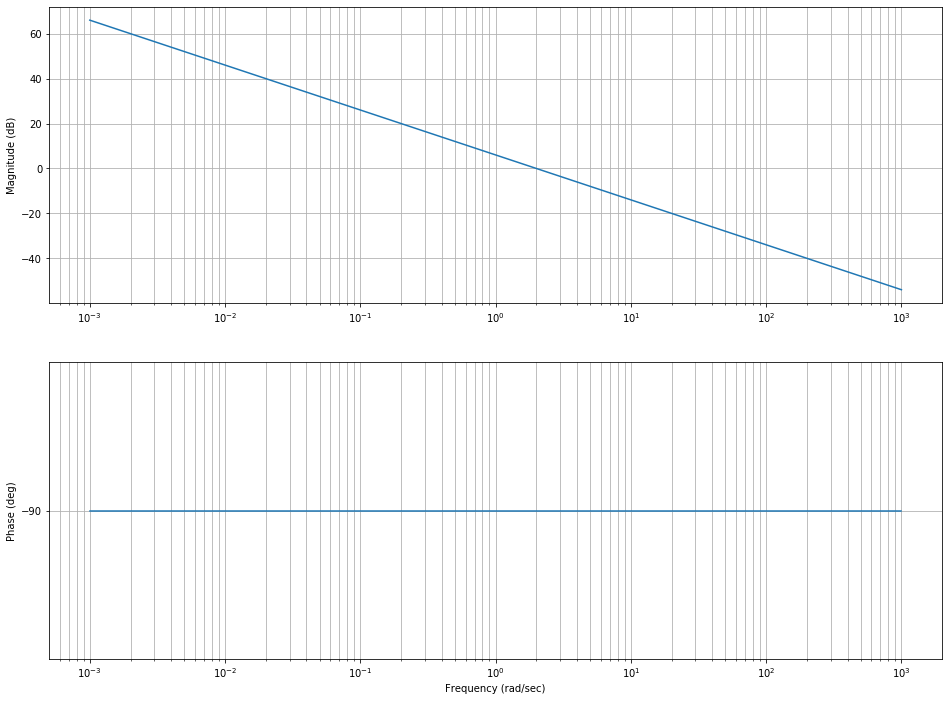

In [0]:
k0 = 2.
tau = 1. 
wn = 100. 
zeta = 0.2
H1 = tf([k0],[1., 0.]);
mag1,ph1,w1 = bode(H1,omega_limits=omega, Hz=False)

## Second Term: $(j \omega \tau + 1)^{1}$
0dB magnitude up until $\omega = 1/\tau$ or $\omega = 1$, then there will be a positive 20dB/decade slope. Phase will be $0^o$ up until $\omega = 1$ and then it will be a positive $90^o$ after that (with it passing through $45^o$ right at $\omega = 1$. 

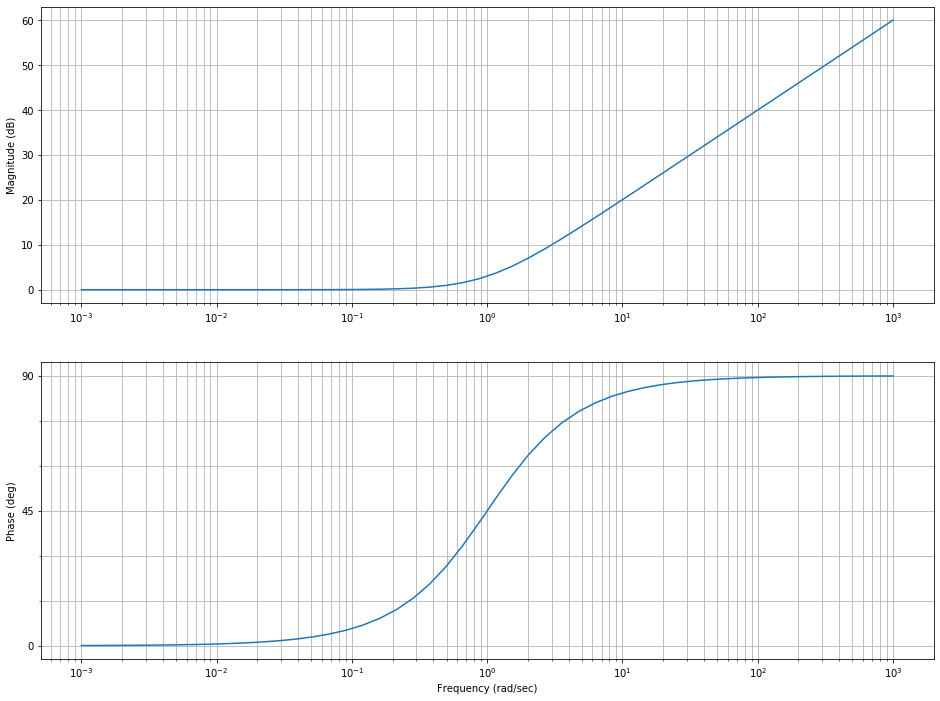

In [0]:
H2 = tf([tau, 1.,],[1.])
mag2,ph2,w2 = bode(H2,omega_limits=omega, Hz=False)

## Third Term: $((\frac{j \omega}{100})^2 + 2 (0.2)(\frac{j \omega}{100}) + 1)$
Magnitude will be at 0dB until $\omega = \omega_n = 100$r/s.  Then, there will be a bit of a spike, since $\zeta = 0.2$, which is small.  Then, after that bump up, there will be a -40dB/decade slope down.  The phase will start at $0^o$, then drop down to $-180^o$ just after $\omega = 100$, with a pretty steep slope, due to the low $\zeta$.  

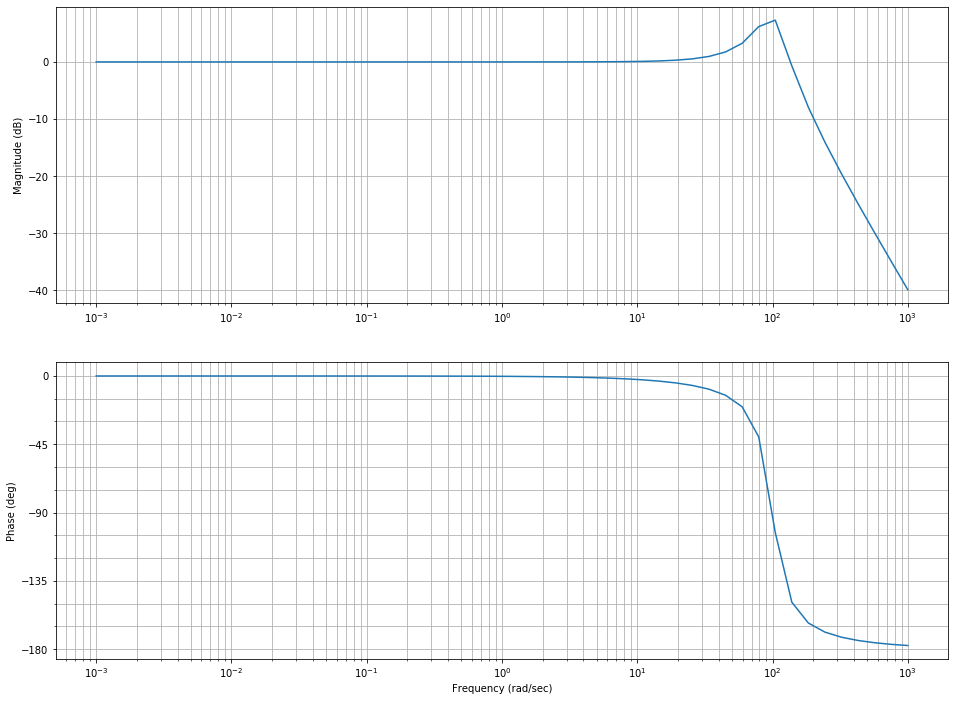

In [0]:
H3 = tf([1.],[(1./wn)**2., 2.*zeta*1./wn, 1.])
mag3,ph3,w3 = bode(H3,omega_limits=omega, Hz=False)

## Composite Sketch


Combining these three sketches for the overall plot, you work from low frequency to high frequency and sum the magnitudes and phases.  

That means for the Magnitude you'll trace the $ 2 (j \omega)^{-1}$ line down to 1 rad/sed, then the $ 2 (j \omega)^{-1}$ and $(j \omega \tau + 1)^{1}$ lines cancel one another and you'll follow the $((\frac{j \omega}{100})^2 + 2 (0.2)(\frac{j \omega}{100}) + 1)$ line after that. 

On the phases, you'll start also with the $ 2 (j \omega)^{-1}$, then you'll come up from the $ 2 (j \omega)^{-1}$ by the amount of the $(j \omega \tau + 1)^{1}$ curve until you hit 100 r/s , and youll then drop down to $-180^o$. 

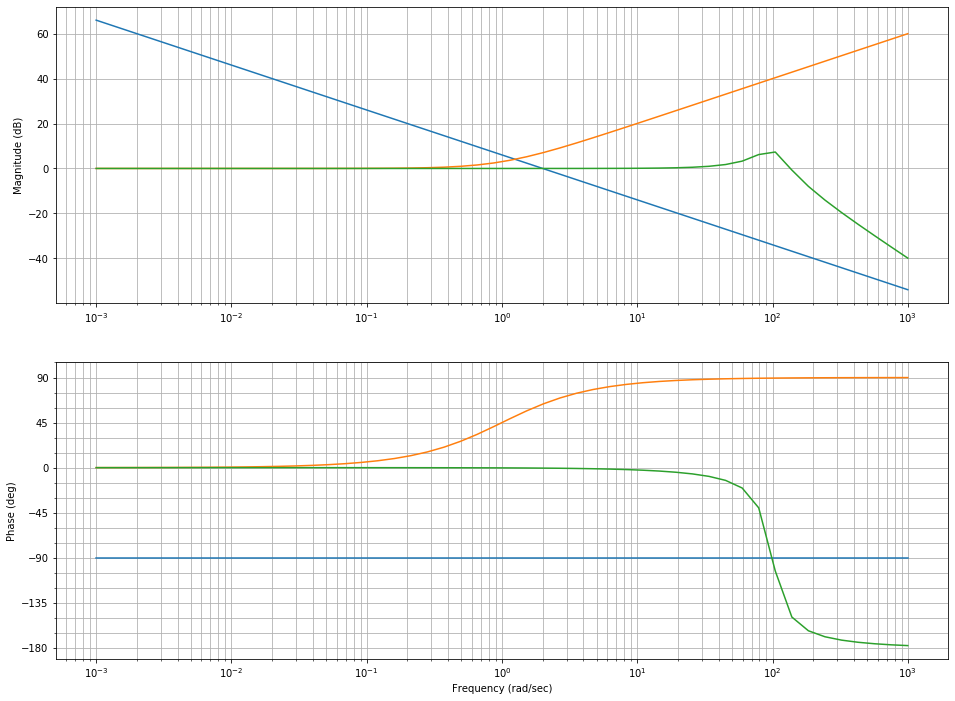

In [0]:
magc,phc,wc = bode(H1,H2,H3,omega_limits=omega, Hz=False)

## Final Sketch

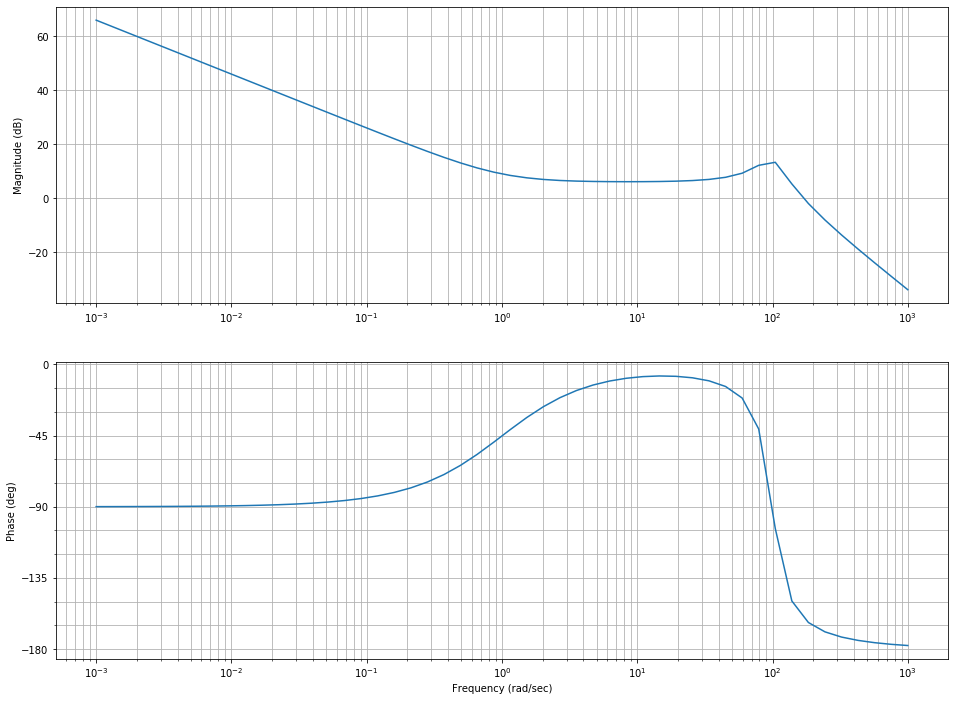

In [0]:
magg,phg,wg = bode(G,omega_limits=omega, Hz=False)

# Design Study A: Single Link Robot Arm


# Design Study B: Inverted Pendulum

# Design Study C: Satellite 

For creating figures: 

In [0]:
#magg,phg,wg = bode(tf([1.],[1.]),omega_limits=omega, Hz=False)